In [2]:
from sklearn.datasets import make_classification

In [3]:
import numpy as np

In [6]:
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)

In [7]:
import matplotlib.pyplot as plt

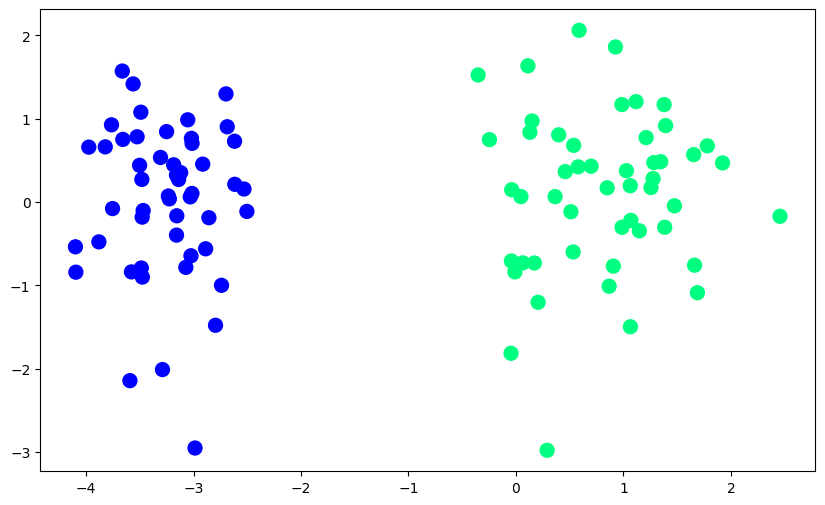

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [9]:
from sklearn.linear_model import LogisticRegression

In [19]:
lo=LogisticRegression(penalty=None,solver='sag')

In [20]:
lo.fit(x,y)

C:\Users\Dell\anaconda3\envs\campusx\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(penalty=None, solver='sag')

In [21]:
print(lo.coef_)
print(lo.intercept_)

[[4.78307331 0.21078915]]
[5.74933234]


In [24]:
m1 = -(lo.coef_[0][0]/lo.coef_[0][1])
b1 = -(lo.intercept_/lo.coef_[0][1])

In [25]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [26]:
def gd(X,y):
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.5
    
    for i in range(5000):
        y_hat = sigmoid(np.dot(X,weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
        
    return weights[1:],weights[0]

In [27]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [29]:
coef_,intercept_ = gd(x,y)

In [30]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

In [31]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input1 + b

(-3.0, 2.0)

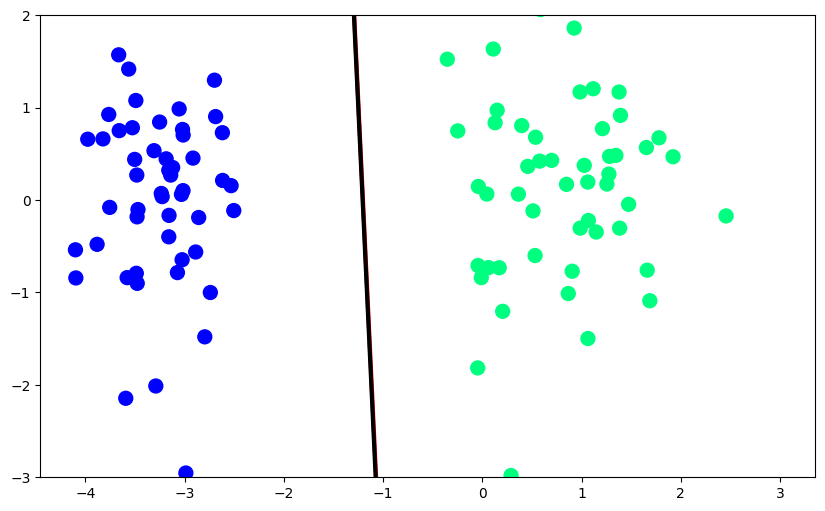

In [33]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)